In [1]:
import os 
import pandas as pd
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import utils 
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
file = '../../data/data_model/data_sound_event_mel_norm_augmented.pickle'

In [6]:
import pickle 

with open(file, 'rb') as handle:
    data = pickle.load(handle)
    
df = pd.read_csv('../../data/filename_train_test.txt',delimiter='\t',header=None)
df.columns=['file','train_test_split']
label = data['label']
label = label.merge(df,on='file',how='left')

X = data['feature']
#index_data = np.where(label.label != 3)[0]
#label = label.iloc[index_data].reset_index()
#X = X[index_data,:]


In [13]:
label

,start,end,label,duration,file,train_test_split,Subject_ID,Location,Device
0,0.000,1.000,0.0,1.000,122_2b1_Tc_mc_LittC2SE,train,122,Tc,LittC2SE
1,0.250,1.250,0.0,1.000,122_2b1_Tc_mc_LittC2SE,train,122,Tc,LittC2SE
2,0.500,1.500,0.0,1.000,122_2b1_Tc_mc_LittC2SE,train,122,Tc,LittC2SE
3,0.750,1.750,0.0,1.000,122_2b1_Tc_mc_LittC2SE,train,122,Tc,LittC2SE
4,1.000,2.000,0.0,1.000,122_2b1_Tc_mc_LittC2SE,train,122,Tc,LittC2SE
...,...,...,...,...,...,...,...,...,...
81880,18.302,19.302,0.0,1.000,154_3b3_Ar_mc_AKGC417L,train,154,Ar,AKGC417L
81881,18.552,19.552,0.0,1.000,154_3b3_Ar_mc_AKGC417L,train,154,Ar,AKGC417L
81882,18.802,19.802,0.0,1.000,154_3b3_Ar_mc_AKGC417L,train,154,Ar,AKGC417L
81883,19.052,20.000,0.0,0.948,154_3b3_Ar_mc_AKGC417L,train,154,Ar,AKGC417L


In [7]:
label['Subject_ID'] = label['file'].str.split('_').str[0]
label['Location'] = label['file'].str.split('_').str[2]
label['Device'] = label['file'].str.split('_').str[4]

IndexError: index 79815 is out of bounds for axis 0 with size 79274

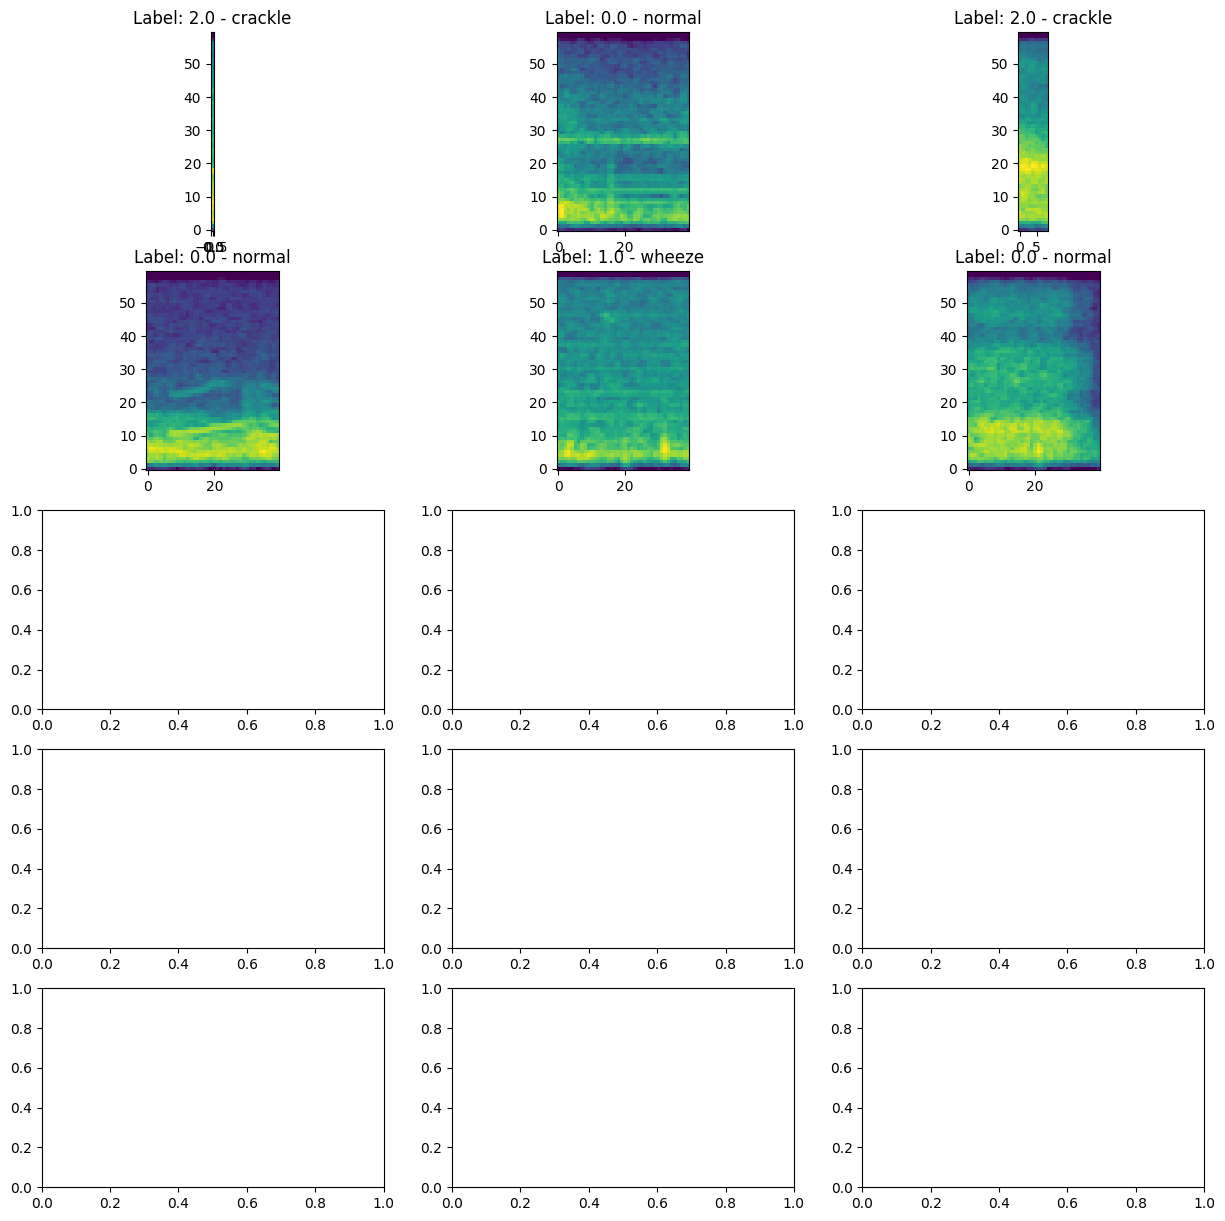

In [12]:
classes = {0:'normal',1:'wheeze',2:'crackle'}
f,axes = plt.subplots(5,3,figsize=(15,15))
axes = axes.flatten()
for ax in axes:
    index_classes_sample = label.sample().index[0]
    label_ = label.label.loc[index_classes_sample]
    try:
        index_padding = np.where(X[index_classes_sample,1,:]==0)[0][0]
        ax.imshow(X[index_classes_sample,:,:index_padding])
    except:
        ax.imshow(X[index_classes_sample,:,:])
    ax.invert_yaxis()
    ax.set_title('Label: {} - {}'.format(label_, classes[label_]))
f = plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

<h1> Vizualization sample <h1>